In [1]:
!pip install matplotlib

In [2]:
from google.colab import files
uploaded = files.upload()

Saving VNM.csv to VNM.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [4]:
df = pd.read_csv("VNM.csv")
df

,Date,Price,Open,High,Low,Vol.,Change %
0,3/1/2019,"110,654.00","112,611.00","112,611.00","110,654.00",1.04M,0.21%
1,3/4/2019,"111,828.00","110,732.00","112,611.00","110,732.00",1.05M,1.06%
2,3/5/2019,"111,124.00","111,515.00","111,750.00","110,811.00",639.01K,-0.63%
3,3/6/2019,"110,341.00","111,124.00","111,750.00","108,385.00",853.50K,-0.70%
4,3/7/2019,"109,324.00","110,576.00","111,124.00","109,167.00",849.60K,-0.92%
...,...,...,...,...,...,...,...
1310,5/29/2024,"66,300.00","67,000.00","67,300.00","66,000.00",3.36M,-0.75%
1311,5/30/2024,"65,700.00","66,100.00","66,200.00","65,500.00",4.41M,-0.90%
1312,5/31/2024,"65,400.00","65,900.00","65,900.00","65,300.00",4.14M,-0.46%
1313,6/3/2024,"66,100.00","65,800.00","66,600.00","65,700.00",3.19M,1.07%


In [5]:
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df['Date'] = pd.to_datetime(df['Date'])
df["Price"] = df["Price"].str.replace(',', '').astype(float)
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-03-01,110654.0,"112,611.00","112,611.00","110,654.00",1.04M,0.21%
1,2019-03-04,111828.0,"110,732.00","112,611.00","110,732.00",1.05M,1.06%
2,2019-03-05,111124.0,"111,515.00","111,750.00","110,811.00",639.01K,-0.63%
3,2019-03-06,110341.0,"111,124.00","111,750.00","108,385.00",853.50K,-0.70%
4,2019-03-07,109324.0,"110,576.00","111,124.00","109,167.00",849.60K,-0.92%
...,...,...,...,...,...,...,...
1310,2024-05-29,66300.0,"67,000.00","67,300.00","66,000.00",3.36M,-0.75%
1311,2024-05-30,65700.0,"66,100.00","66,200.00","65,500.00",4.41M,-0.90%
1312,2024-05-31,65400.0,"65,900.00","65,900.00","65,300.00",4.14M,-0.46%
1313,2024-06-03,66100.0,"65,800.00","66,600.00","65,700.00",3.19M,1.07%


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1315 non-null   datetime64[ns]
 1   Price     1315 non-null   float64       
 2   Open      1315 non-null   object        
 3   High      1315 non-null   object        
 4   Low       1315 non-null   object        
 5   Vol.      1315 non-null   object        
 6   Change %  1315 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 72.0+ KB


<h1> # Split the data into training, testing, and validation sets (7:2:1)


In [7]:
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [8]:
#Qua trinh Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])


In [9]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
#Qua trinh Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [21]:
#Qua trinh Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

In [22]:
# Create index for the next 30, 60, and 90 days
index_30_days = pd.RangeIndex(start=len(df), stop=len(df) + 30)
index_60_days = pd.RangeIndex(start=len(df) + 30, stop=len(df) + 60)
index_90_days = pd.RangeIndex(start=len(df) + 60, stop=len(df) + 90)

# Extract the closing price of the last day
last_day_close = df.iloc[-1]['Price']

# Create feature arrays for the next 30, 60, and 90 days
features_30_days = np.repeat(last_day_close, 30)
features_60_days = np.repeat(last_day_close, 30)
features_90_days = np.repeat(last_day_close, 30)

# Predict the closing prices for the next 30, 60, and 90 days
predictions_30_days = model.predict(features_30_days.reshape(-1, 1))
predictions_60_days = model.predict(features_60_days.reshape(-1, 1))
predictions_90_days = model.predict(features_90_days.reshape(-1, 1))

# Create a dataframe to store the predicted prices with the new index
predicted_30_days_df = pd.DataFrame(predictions_30_days, index=index_30_days, columns=['Predicted Close'])
predicted_60_days_df = pd.DataFrame(predictions_60_days, index=index_60_days, columns=['Predicted Close'])
predicted_90_days_df = pd.DataFrame(predictions_90_days, index=index_90_days, columns=['Predicted Close'])

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predicted_30_days_df)

# Print the predicted closing prices for the next 60 and 90 days
print('Predicted closing prices for the next 60 days:')
print(predicted_60_days_df)

print('Predicted closing prices for the next 90 days:')
print(predicted_90_days_df)

Predicted closing prices for the next 30 days:
      Predicted Close
1315          72999.0
1316          72999.0
1317          72999.0
1318          72999.0
1319          72999.0
1320          72999.0
1321          72999.0
1322          72999.0
1323          72999.0
1324          72999.0
1325          72999.0
1326          72999.0
1327          72999.0
1328          72999.0
1329          72999.0
1330          72999.0
1331          72999.0
1332          72999.0
1333          72999.0
1334          72999.0
1335          72999.0
1336          72999.0
1337          72999.0
1338          72999.0
1339          72999.0
1340          72999.0
1341          72999.0
1342          72999.0
1343          72999.0
1344          72999.0
Predicted closing prices for the next 60 days:
      Predicted Close
1345          72999.0
1346          72999.0
1347          72999.0
1348          72999.0
1349          72999.0
1350          72999.0
1351          72999.0
1352          72999.0
1353          72999.0
1354

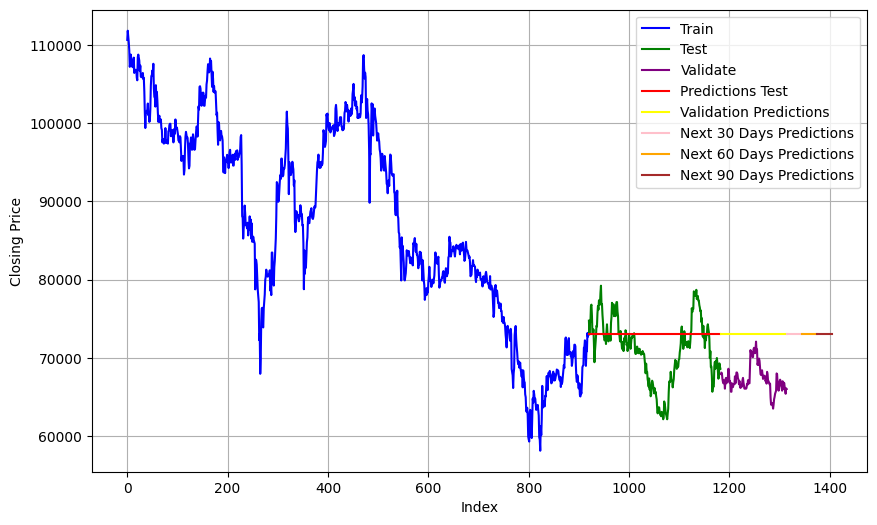

In [23]:
#Vẽ hình
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train')
plt.plot(x_test, y_test, color='green', label='Test')
plt.plot(x_val, y_val, color='purple', label='Validate')
plt.plot(x_test, y_pred, color='red', label='Predictions Test')
plt.plot(x_val, y_pred_val, color='yellow', label='Validation Predictions')
plt.plot(predicted_30_days_df, color='pink', label='Next 30 Days Predictions')
plt.plot(predicted_60_days_df, color='orange', label='Next 60 Days Predictions')
plt.plot(predicted_90_days_df, color='brown', label='Next 90 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
#Tính RMSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)

valid_rmse = np.sqrt(valid_mse)
test_rmse = np.sqrt(test_mse)

valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)*100
test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 5972.943320114606
Testing RMSE: 4496.049170595246
Validation MAE: 5737.3969696968525
Testing MAE: 3457.5551330798053
Validation MAPE: 8.595111553837107
Testing MAPE: 5.050783762788648


<h1> # Split the data into training, testing, and validation sets (6:3:1)

In [25]:
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [26]:
#Qua trinh Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])


In [27]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
#Qua trinh Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [29]:
#Qua trinh Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

In [30]:
# Create index for the next 30, 60, and 90 days
index_30_days = pd.RangeIndex(start=len(df), stop=len(df) + 30)
index_60_days = pd.RangeIndex(start=len(df) + 30, stop=len(df) + 60)
index_90_days = pd.RangeIndex(start=len(df) + 60, stop=len(df) + 90)

# Extract the closing price of the last day
last_day_close = df.iloc[-1]['Price']

# Create feature arrays for the next 30, 60, and 90 days
features_30_days = np.repeat(last_day_close, 30)
features_60_days = np.repeat(last_day_close, 30)
features_90_days = np.repeat(last_day_close, 30)

# Predict the closing prices for the next 30, 60, and 90 days
predictions_30_days = model.predict(features_30_days.reshape(-1, 1))
predictions_60_days = model.predict(features_60_days.reshape(-1, 1))
predictions_90_days = model.predict(features_90_days.reshape(-1, 1))

# Create a dataframe to store the predicted prices with the new index
predicted_30_days_df = pd.DataFrame(predictions_30_days, index=index_30_days, columns=['Predicted Close'])
predicted_60_days_df = pd.DataFrame(predictions_60_days, index=index_60_days, columns=['Predicted Close'])
predicted_90_days_df = pd.DataFrame(predictions_90_days, index=index_90_days, columns=['Predicted Close'])

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predicted_30_days_df)

# Print the predicted closing prices for the next 60 and 90 days
print('Predicted closing prices for the next 60 days:')
print(predicted_60_days_df)

print('Predicted closing prices for the next 90 days:')
print(predicted_90_days_df)

Predicted closing prices for the next 30 days:
      Predicted Close
1315         67080.45
1316         67080.45
1317         67080.45
1318         67080.45
1319         67080.45
1320         67080.45
1321         67080.45
1322         67080.45
1323         67080.45
1324         67080.45
1325         67080.45
1326         67080.45
1327         67080.45
1328         67080.45
1329         67080.45
1330         67080.45
1331         67080.45
1332         67080.45
1333         67080.45
1334         67080.45
1335         67080.45
1336         67080.45
1337         67080.45
1338         67080.45
1339         67080.45
1340         67080.45
1341         67080.45
1342         67080.45
1343         67080.45
1344         67080.45
Predicted closing prices for the next 60 days:
      Predicted Close
1345         67080.45
1346         67080.45
1347         67080.45
1348         67080.45
1349         67080.45
1350         67080.45
1351         67080.45
1352         67080.45
1353         67080.45
1354

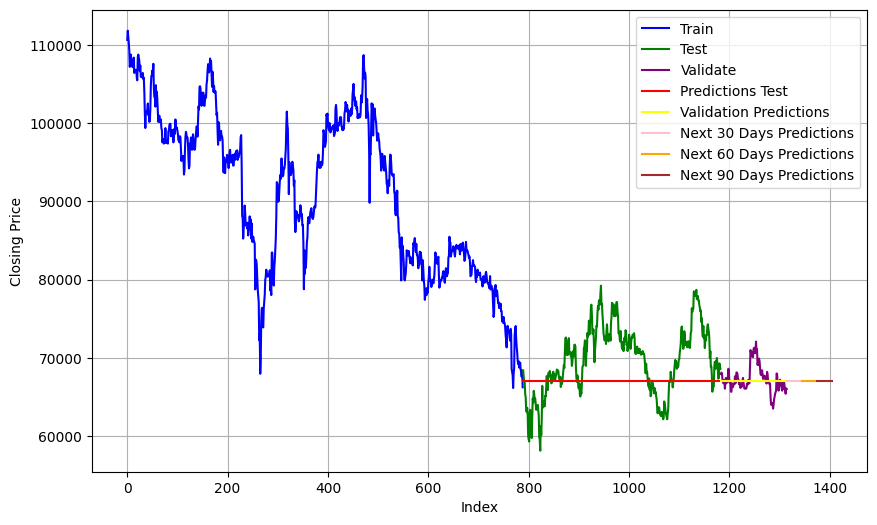

In [31]:
#Vẽ hình
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train')
plt.plot(x_test, y_test, color='green', label='Test')
plt.plot(x_val, y_val, color='purple', label='Validate')
plt.plot(x_test, y_pred, color='red', label='Predictions Test')
plt.plot(x_val, y_pred_val, color='yellow', label='Validation Predictions')
plt.plot(predicted_30_days_df, color='pink', label='Next 30 Days Predictions')
plt.plot(predicted_60_days_df, color='orange', label='Next 60 Days Predictions')
plt.plot(predicted_90_days_df, color='brown', label='Next 90 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
#Tính RMSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)

valid_rmse = np.sqrt(valid_mse)
test_rmse = np.sqrt(test_mse)

valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)*100
test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 1670.6718222927618
Testing RMSE: 5062.846810993405
Validation MAE: 1190.5310606060661
Testing MAE: 4166.3289340101355
Validation MAPE: 1.7531187381466702
Testing MAPE: 5.846299212988442


<h1> # Split the data into training, testing, and validation sets (5:3:2)

In [33]:
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [34]:
#Qua trinh Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [35]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
#Qua trinh Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [37]:
#Qua trinh Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

In [38]:
# Create index for the next 30, 60, and 90 days
index_30_days = pd.RangeIndex(start=len(df), stop=len(df) + 30)
index_60_days = pd.RangeIndex(start=len(df) + 30, stop=len(df) + 60)
index_90_days = pd.RangeIndex(start=len(df) + 60, stop=len(df) + 90)

# Extract the closing price of the last day
last_day_close = df.iloc[-1]['Price']

# Create feature arrays for the next 30, 60, and 90 days
features_30_days = np.repeat(last_day_close, 30)
features_60_days = np.repeat(last_day_close, 30)
features_90_days = np.repeat(last_day_close, 30)

# Predict the closing prices for the next 30, 60, and 90 days
predictions_30_days = model.predict(features_30_days.reshape(-1, 1))
predictions_60_days = model.predict(features_60_days.reshape(-1, 1))
predictions_90_days = model.predict(features_90_days.reshape(-1, 1))

# Create a dataframe to store the predicted prices with the new index
predicted_30_days_df = pd.DataFrame(predictions_30_days, index=index_30_days, columns=['Predicted Close'])
predicted_60_days_df = pd.DataFrame(predictions_60_days, index=index_60_days, columns=['Predicted Close'])
predicted_90_days_df = pd.DataFrame(predictions_90_days, index=index_90_days, columns=['Predicted Close'])

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predicted_30_days_df)

# Print the predicted closing prices for the next 60 and 90 days
print('Predicted closing prices for the next 60 days:')
print(predicted_60_days_df)

print('Predicted closing prices for the next 90 days:')
print(predicted_90_days_df)

Predicted closing prices for the next 30 days:
      Predicted Close
1315        84225.018
1316        84225.018
1317        84225.018
1318        84225.018
1319        84225.018
1320        84225.018
1321        84225.018
1322        84225.018
1323        84225.018
1324        84225.018
1325        84225.018
1326        84225.018
1327        84225.018
1328        84225.018
1329        84225.018
1330        84225.018
1331        84225.018
1332        84225.018
1333        84225.018
1334        84225.018
1335        84225.018
1336        84225.018
1337        84225.018
1338        84225.018
1339        84225.018
1340        84225.018
1341        84225.018
1342        84225.018
1343        84225.018
1344        84225.018
Predicted closing prices for the next 60 days:
      Predicted Close
1345        84225.018
1346        84225.018
1347        84225.018
1348        84225.018
1349        84225.018
1350        84225.018
1351        84225.018
1352        84225.018
1353        84225.018
1354

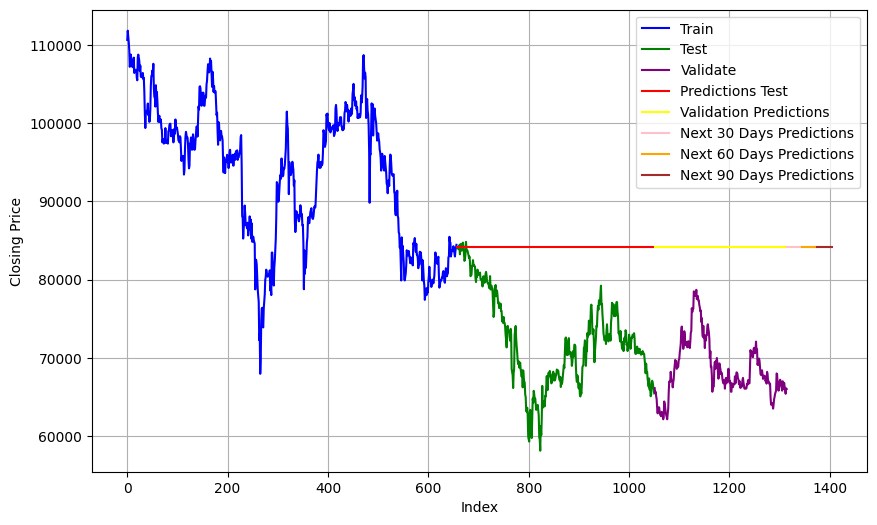

In [39]:
#Vẽ hình
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train')
plt.plot(x_test, y_test, color='green', label='Test')
plt.plot(x_val, y_val, color='purple', label='Validate')
plt.plot(x_test, y_pred, color='red', label='Predictions Test')
plt.plot(x_val, y_pred_val, color='yellow', label='Validation Predictions')
plt.plot(predicted_30_days_df, color='pink', label='Next 30 Days Predictions')
plt.plot(predicted_60_days_df, color='orange', label='Next 60 Days Predictions')
plt.plot(predicted_90_days_df, color='brown', label='Next 90 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
#Tính RMSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)

valid_rmse = np.sqrt(valid_mse)
test_rmse = np.sqrt(test_mse)

valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)*100
test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 16082.741942616985
Testing RMSE: 13291.064086717326
Validation MAE: 15657.37254545444
Testing MAE: 11912.84334010142
Validation MAPE: 23.17564492278157
Testing MAPE: 17.247976281089585
